In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape

11501568/11490434 [==============================] - 5s 0us/step


(60000, 28, 28)

In [ ]:
print(x_train[0])

/var/folders/br/6hntxn5x6dz46z378ncftwm00000gn/T/ipykernel_13707/97179941.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


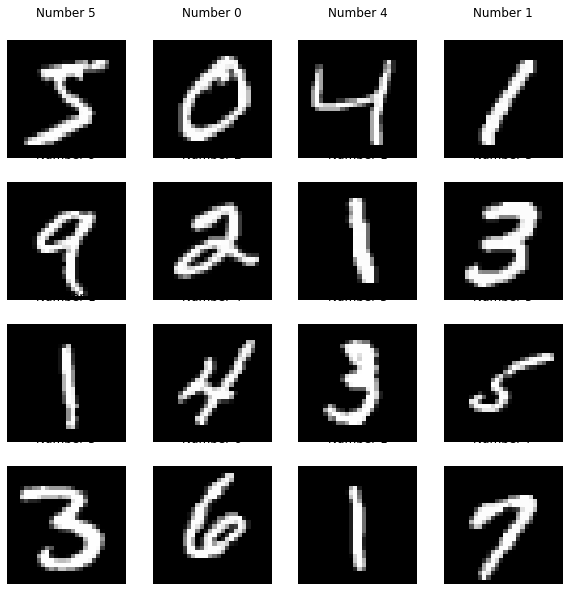

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, axs = plt.subplots(4, 4, figsize = (10, 10))
plt.gray()
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
fig.show()

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
#print(x_train.ndlm)

AttributeError: 'numpy.ndarray' object has no attribute 'ndlm'

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2132 - accuracy: 0.9365
Epoch 2/3
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0856 - accuracy: 0.9735
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0600 - accuracy: 0.9810


In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0539 - accuracy: 0.9828


[0.05392090603709221, 0.9828000068664551]